In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nilearn import plotting
import nibabel as nb

/home/hw1012/.pyenv/versions/3.7.5/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Behavioural data - CDS subscale  x metacognition in patients

In [2]:
beh_data = pd.read_csv("../data/derivatives/group_level_stats.tsv", sep="\t")

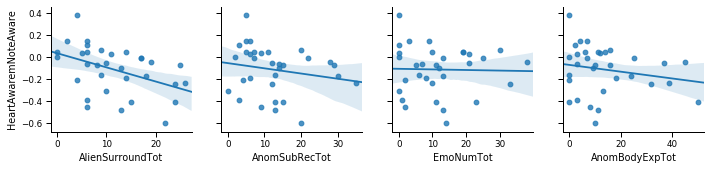

In [3]:
sns.set_context("paper")
sns.pairplot(beh_data, 
             x_vars=["AlienSurroundTot", "AnomSubRecTot", "EmoNumTot", "AnomBodyExpTot"], 
             y_vars=["HeartAwaremNoteAware"],
             kind="reg")

## Task maps

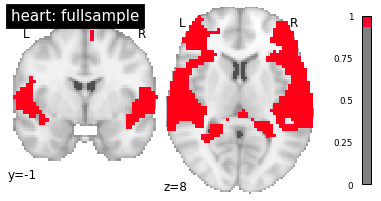

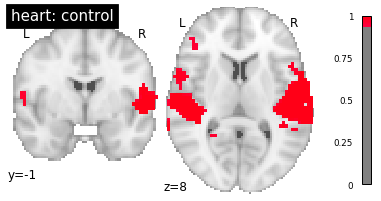

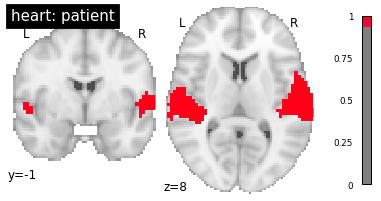

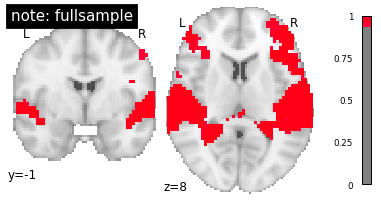

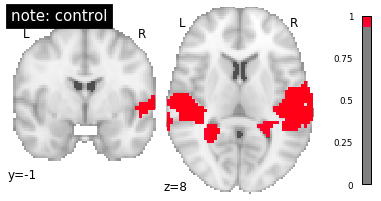

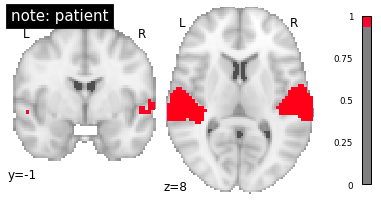

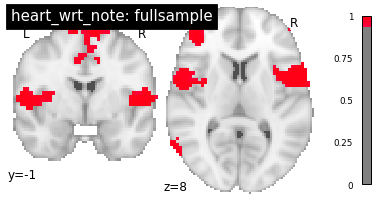

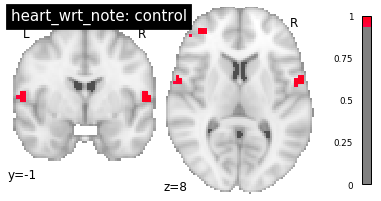

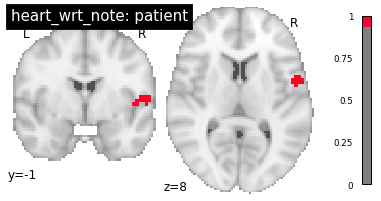

In [52]:
for c in ["heart", "note", "heart_wrt_note"]:
    for g in ["fullsample", "control", "patient"]:
        tfce = f"glm_niftis/FSL_task/contrast_{c}/{g}_randomise_tfce_corrp_tstat.nii.gz"
        title = ": ".join([c, g])
        plotting.plot_stat_map(tfce, title=title, cmap="hsv", 
                               display_mode="yz", cut_coords=(-1, 8),
                               vmax=1, threshold=0.95, draw_cross=False)

## PPI

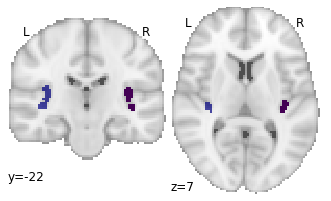

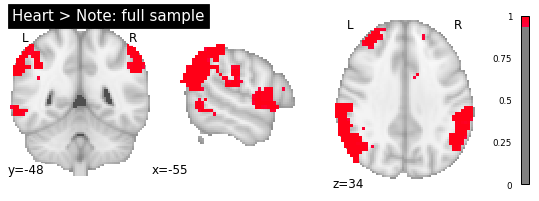

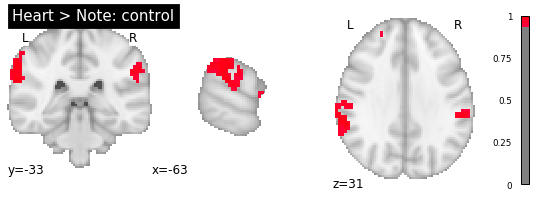

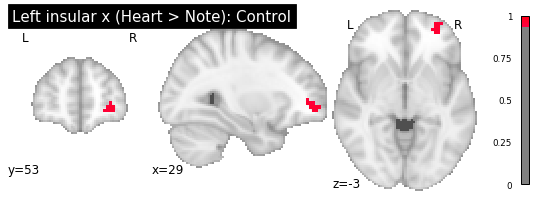

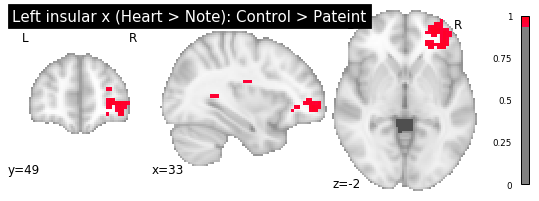

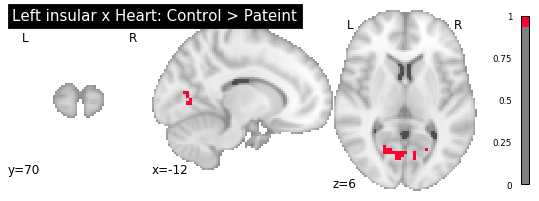

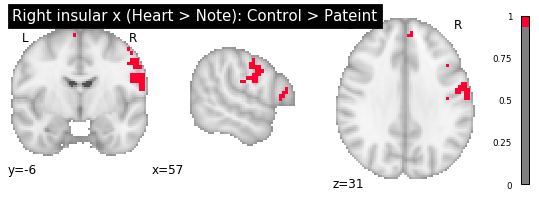

In [45]:
def sig_map(s_name, c_name, g_name, coord, title):
    p = 0.05
    tfce = f"./glm_niftis/FSL_PPI/{s_name}/contrast_{c_name}/{g_name}_tfce_corrp_tstat1.nii.gz"

    plotting.plot_stat_map(tfce, title=title, cmap="hsv", cut_coords=coord, 
                           vmax=1, threshold=0.949, draw_cross=False)
roi = plotting.plot_roi("../references/insular_masks/juelich_GM_insular_prob90_L.nii.gz",
                        display_mode="yz",
                        draw_cross=False)
roi.add_overlay("../references/insular_masks/juelich_GM_insular_prob90_R.nii.gz")

sig_map("insularL", "seed_int_Heart_wrt_Note", 
        "control", (29, 53, -3), "Left insular x (Heart > Note): Control")
sig_map("insularL", "seed_int_Heart_wrt_Note", 
        "control_wrt_patient", (33, 49, -2), "Left insular x (Heart > Note): Control > Pateint")
sig_map("insularL", "seed_int_Heart", 
        "control_wrt_patient", (-12, 70, 6), "Left insular x Heart: Control > Pateint")
sig_map("insularR", "seed_int_Heart_wrt_Note", 
        "control_wrt_patient", (57, -6, 31), "Right insular x (Heart > Note): Control > Pateint")

## cope value x continutous HRV